In [19]:
!pip install mp-api --upgrade
import numpy as np
from mp_api.client import MPRester
#from pymatgen.ext.matproj import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Defaulting to user installation because normal site-packages is not writeable


In [20]:
mp_key = "kqoGOG3L85VvUgz1hujhLArYSrmj87fq"
mp_id = "mp-10182"

In [21]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
    el_dos = m.get_dos_by_material_id(mp_id)
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)
    ph_dos = m.get_phonon_dos_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()
symmops = SpacegroupAnalyzer(conv_struc).get_space_group_operations()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator
xrd = XRDCalculator('CuKa',1.54060)
pattern = xrd.get_pattern(prim_struc)

# Pics du diffractogramme

# Premier pic

In [23]:
print("Indices hkl: ", pattern.hkls[0])
print("Intensité = ",pattern.y[0])  
print("2\u03B8(°) = ", pattern.x[0],"°")
print("Distance interplan = ",pattern.d_hkls[0])

Indices hkl:  [{'hkl': (1, 1, 1), 'multiplicity': 8}]
Intensité =  100.0
2θ(°) =  27.095701905425877 °
Distance interplan =  3.2909104252819446


# Deuxième pic

In [24]:
print("Indices hkl: ", pattern.hkls[1])
print("Intensité = ",pattern.y[1])
print("2\u03B8(°) = ", pattern.x[1],"°")
print("Distance interplan = ",pattern.d_hkls[1])

Indices hkl:  [{'hkl': (2, 0, 0), 'multiplicity': 6}]
Intensité =  19.713220787647693
2θ(°) =  31.38769911816056 °
Distance interplan =  2.850012029873215


# Troisième pic

In [25]:
print("Indices hkl: ", pattern.hkls[2])
print("Intensité = ",pattern.y[2])   
print("2\u03B8(°) = ", pattern.x[2],"°")
print("Distance interplan = ",pattern.d_hkls[2])

Indices hkl:  [{'hkl': (2, 2, 0), 'multiplicity': 12}]
Intensité =  77.6267231164264
2θ(°) =  44.98229367277368 °
Distance interplan =  2.0152628327865876


# Graphique

<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

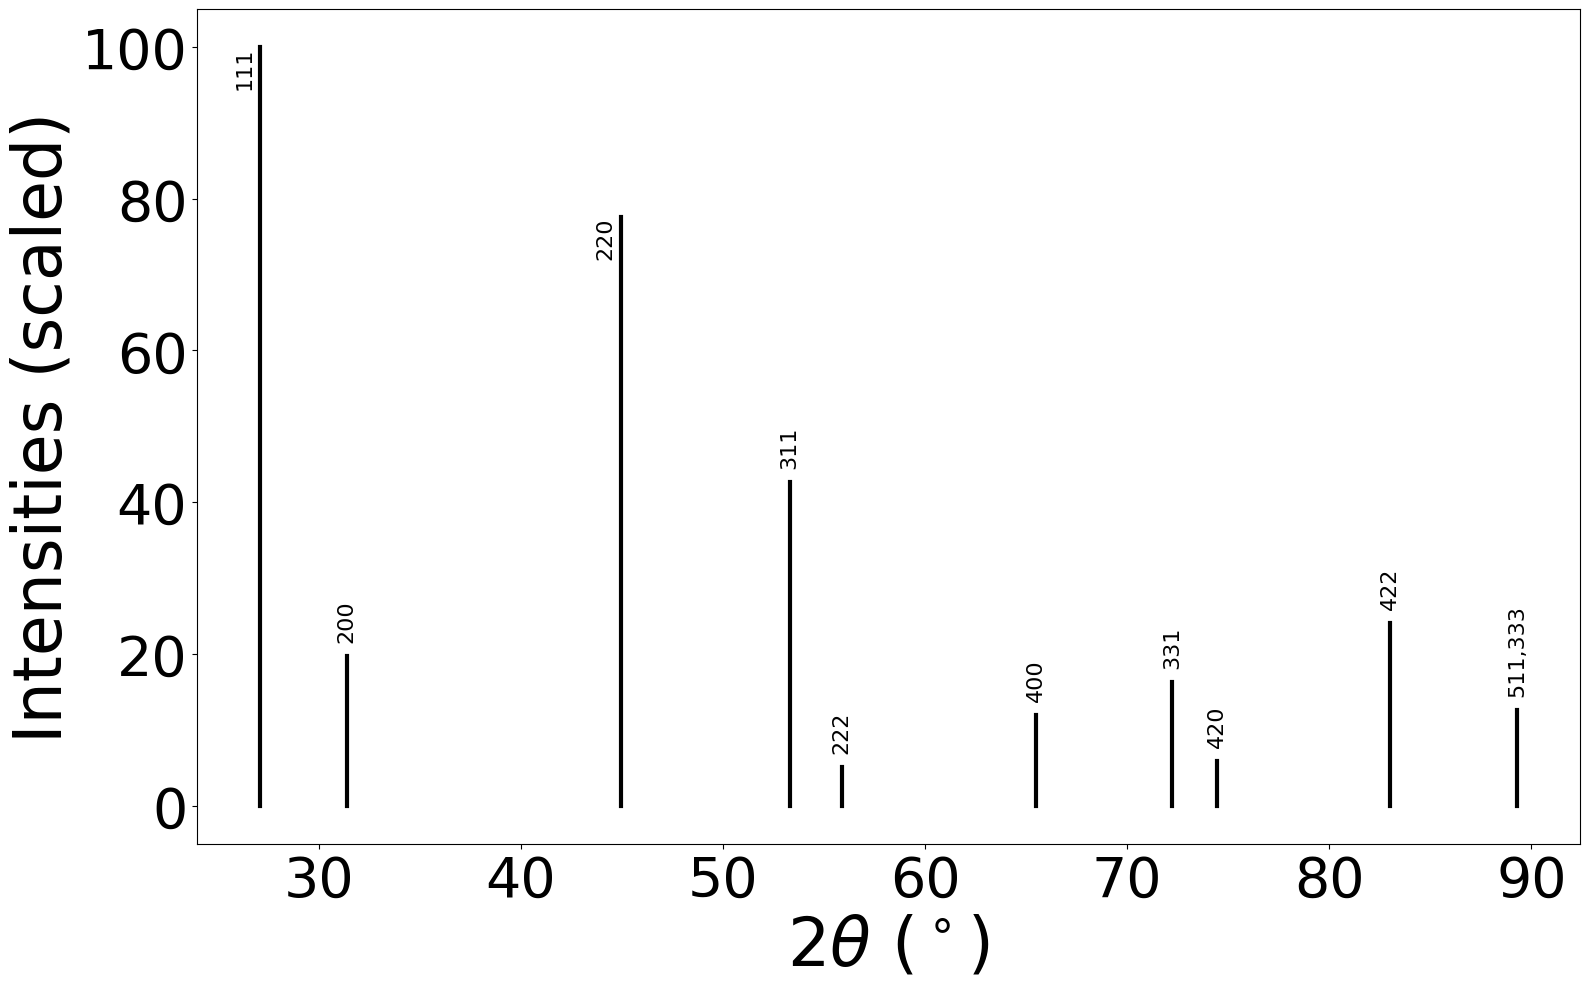

In [26]:
xrd.get_plot(prim_struc)